In [1]:
import pandas as pan
import numpy as num
import matplotlib.pyplot as mat
import os

In [2]:
# Get the current working directory
# The current working directory is the one storing the ipynb file
wd = os.getcwd()

### This case study tries to explore the relationship between literacy and the mobile adoption of a country. The result could be used to gauge the technological adoption of a country.  We will be using the following two sets of data:
#### https://ourworldindata.org/technology-adoption#mobile-phone-adoption
#### https://ourworldindata.org/literacy

In [3]:
# scenario 1 - using the mean literacy and mean mobile adoption values of selected countries

In [4]:
# https://ourworldindata.org/technology-adoption#mobile-phone-adoption
# Get the data
df1a = pan.read_csv("literacy-rate-adults.csv")

In [5]:
df1a.head()

,Entity,Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
0,Afghanistan,AFG,1979,18.157681
1,Afghanistan,AFG,2011,31.448851
2,Afghanistan,AFG,2018,43.019718
3,Albania,ALB,2001,98.712982
4,Albania,ALB,2008,95.938637


In [6]:
df1a.shape

(2504, 4)

In [7]:
df1a.dtypes

Entity                                                         object
Code                                                           object
Year                                                            int64
Literacy rate, adult total (% of people ages 15 and above)    float64
dtype: object

In [8]:
df1a.nunique()

Entity                                                         208
Code                                                           170
Year                                                            50
Literacy rate, adult total (% of people ages 15 and above)    2408
dtype: int64

In [9]:
entity1a = df1a["Entity"].value_counts()
entity1a

Middle East & North Africa (IDA & IBRD)               49
Middle East & North Africa (excluding high income)    48
Middle East & North Africa                            47
Latin America & Caribbean (excluding high income)     46
Latin America & Caribbean                             46
                                                      ..
Marshall Islands                                       1
North Korea                                            1
San Marino                                             1
American Samoa                                         1
Czechia                                                1
Name: Entity, Length: 208, dtype: int64

In [10]:
literacy1 = df1a.groupby(["Entity"])[["Literacy rate, adult total (% of people ages 15 and above)"]].agg(num.mean)
literacy1

,"Literacy rate, adult total (% of people ages 15 and above)"
Entity,
Afghanistan,30.875416
Albania,97.377008
Algeria,69.739388
American Samoa,97.344162
Angola,66.717766
...,...
Vietnam,90.062941
World,77.820765
Yemen,45.594999


In [11]:
literacy1 = literacy1.sort_values(by="Entity",ascending=True).reset_index()
literacy1

,Entity,"Literacy rate, adult total (% of people ages 15 and above)"
0,Afghanistan,30.875416
1,Albania,97.377008
2,Algeria,69.739388
3,American Samoa,97.344162
4,Angola,66.717766
...,...,...
203,Vietnam,90.062941
204,World,77.820765
205,Yemen,45.594999
206,Zambia,72.172003


In [12]:
# save as csv file
literacy1.to_csv("rankbyliteracy.csv", index=False)

In [13]:
# https://ourworldindata.org/literacy
# Get the data
df1b = pan.read_csv("mobile-cellular-subscriptions-per-100-people.csv")

In [14]:
df1b.head()

,Entity,Code,Year,Mobile cellular subscriptions (per 100 people)
0,Afghanistan,AFG,1960,0.0
1,Afghanistan,AFG,1965,0.0
2,Afghanistan,AFG,1970,0.0
3,Afghanistan,AFG,1975,0.0
4,Afghanistan,AFG,1976,0.0


In [15]:
df1b.shape

(11895, 4)

In [16]:
df1b.dtypes

Entity                                             object
Code                                               object
Year                                                int64
Mobile cellular subscriptions (per 100 people)    float64
dtype: object

In [17]:
df1b.nunique()

Entity                                             262
Code                                               215
Year                                                48
Mobile cellular subscriptions (per 100 people)    7084
dtype: int64

In [18]:
entity1b = df1b["Entity"].value_counts()
entity1b

Afghanistan                  48
IDA & IBRD total             48
Lithuania                    48
Low & middle income          48
Lower middle income          48
                             ..
Palau                        14
Curacao                      11
South Sudan                  10
Kosovo                        6
Sint Maarten (Dutch part)     1
Name: Entity, Length: 262, dtype: int64

In [19]:
mobile1 = df1b.groupby(["Entity"])[["Mobile cellular subscriptions (per 100 people)"]].agg(num.mean)
mobile1

,Mobile cellular subscriptions (per 100 people)
Entity,
Afghanistan,13.339800
Africa Eastern and Southern,15.619950
Africa Western and Central,19.599950
Albania,32.424179
Algeria,29.932378
...,...
Vietnam,34.931780
World,27.604891
Yemen,13.632878


In [20]:
mobile1 = mobile1.sort_values(by="Entity",ascending=True).reset_index()
mobile1

,Entity,Mobile cellular subscriptions (per 100 people)
0,Afghanistan,13.339800
1,Africa Eastern and Southern,15.619950
2,Africa Western and Central,19.599950
3,Albania,32.424179
4,Algeria,29.932378
...,...,...
257,Vietnam,34.931780
258,World,27.604891
259,Yemen,13.632878
260,Zambia,17.323122


In [21]:
mobile1.to_csv("rankbymobile.csv", index=False)

In [22]:
# Prepare the data for the selected countries
countrylist = ["Argentina","Brazil","China","Egypt","Israel","Saudi Arabia","South Africa"]

In [23]:
countrylist = pan.DataFrame(countrylist,columns=["Name"])
countrylist

,Name
0,Argentina
1,Brazil
2,China
3,Egypt
4,Israel
5,Saudi Arabia
6,South Africa


In [24]:
countrylist["Literacy"] = 0.0
countrylist["Mobile Adoption"] = 0.0

In [25]:
countrylist

,Name,Literacy,Mobile Adoption
0,Argentina,0.0,0.0
1,Brazil,0.0,0.0
2,China,0.0,0.0
3,Egypt,0.0,0.0
4,Israel,0.0,0.0
5,Saudi Arabia,0.0,0.0
6,South Africa,0.0,0.0


In [28]:
lencountry = len(countrylist)
lencountry

7

In [31]:
count1=0
for ind1 in range(len(literacy1)):
    if (count1 < lencountry):
        if (countrylist["Name"][count1] == literacy1["Entity"][ind1]):
            countrylist.loc[0:lencountry,"Literacy"][count1] = literacy1["Literacy rate, adult total (% of people ages 15 and above)"][ind1]
            count1+=1

In [32]:
countrylist

,Name,Literacy,Mobile Adoption
0,Argentina,98.256486,0.0
1,Brazil,89.814493,0.0
2,China,85.235146,0.0
3,Egypt,62.381525,0.0
4,Israel,91.751411,0.0
5,Saudi Arabia,84.557059,0.0
6,South Africa,89.547812,0.0


In [33]:
count2=0
for ind1 in range(len(mobile1)):
    if (count2 < lencountry):
        if (countrylist["Name"][count2] == mobile1["Entity"][ind1]):
            countrylist.loc[0:lencountry,"Mobile Adoption"][count2] = mobile1["Mobile cellular subscriptions (per 100 people)"][ind1]
            count2+=1

In [34]:
countrylist

,Name,Literacy,Mobile Adoption
0,Argentina,98.256486,42.793419
1,Brazil,89.814493,33.777981
2,China,85.235146,25.368800
3,Egypt,62.381525,26.001571
4,Israel,91.751411,84.371824
5,Saudi Arabia,84.557059,75.703426
6,South Africa,89.547812,42.231826


In [35]:
# Explore the relationship

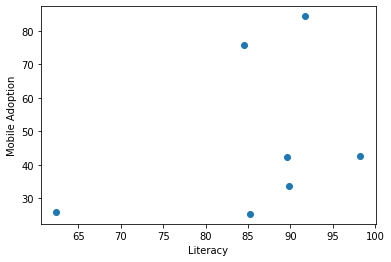

In [36]:
mat.scatter(countrylist["Literacy"],countrylist["Mobile Adoption"])
mat.xlabel("Literacy")
mat.ylabel("Mobile Adoption")
mat.show()

In [37]:
corr1 = countrylist[["Literacy","Mobile Adoption"]]
corr1.corr()

,Literacy,Mobile Adoption
Literacy,1.000000,0.353238
Mobile Adoption,0.353238,1.000000


### Conclusion for scenario 1
#### The correlation is positive, but it is not very strong.

In [38]:
# scenario 2 - using categorical income level values with literacy mean or mobile adoption mean values

In [39]:
# prepare the data on literacy rate
con1a = df1a["Entity"] == "Upper middle income"
con1b = df1a["Entity"] == "Middle income"
con1c = df1a["Entity"] == "Low & middle income"

In [40]:
lit1 = df1a[con1a+con1b+con1c]

In [41]:
lit1

,Entity,Code,Year,"Literacy rate, adult total (% of people ages 15 and above)"
1293,Low & middle income,NaN,1975,59.013229
1294,Low & middle income,NaN,1976,59.126751
1295,Low & middle income,NaN,1977,59.418259
1296,Low & middle income,NaN,1978,60.088741
1297,Low & middle income,NaN,1979,60.732830
...,...,...,...,...
2400,Upper middle income,NaN,2015,95.099617
2401,Upper middle income,NaN,2016,95.623756
2402,Upper middle income,NaN,2017,95.670853
2403,Upper middle income,NaN,2018,95.451447


In [42]:
lit1 = lit1.groupby(["Entity"])[["Literacy rate, adult total (% of people ages 15 and above)"]].agg(num.mean).sort_index().reset_index()
lit1

,Entity,"Literacy rate, adult total (% of people ages 15 and above)"
0,Low & middle income,73.169221
1,Middle income,74.840029
2,Upper middle income,85.642230


In [43]:
# Since the data for literacy don't have "High income", we will use "Upper middle income" instead. We will change the name of "Upper middle income" to "High income"
lit1.loc[0:,"Entity"][2] = "High income"

In [44]:
lit1 = lit1.sort_values(by="Literacy rate, adult total (% of people ages 15 and above)",ascending=False).reset_index()
# drop the old index column
lit1 = lit1.drop(labels="index", axis=1)
lit1

,Entity,"Literacy rate, adult total (% of people ages 15 and above)"
0,High income,85.642230
1,Middle income,74.840029
2,Low & middle income,73.169221


In [45]:
# prepare the data on mobile adoption rate
con2a = df1b["Entity"] == "High income"
con2b = df1b["Entity"] == "Middle income"
con2c = df1b["Entity"] == "Low & middle income"

In [46]:
mobile1 = df1b[con2a+con2b+con2c]

In [47]:
mobile1

,Entity,Code,Year,Mobile cellular subscriptions (per 100 people)
4654,High income,NaN,1960,0.000000
4655,High income,NaN,1965,0.000000
4656,High income,NaN,1970,0.000000
4657,High income,NaN,1975,0.000000
4658,High income,NaN,1976,0.000000
...,...,...,...,...
7374,Middle income,NaN,2015,96.326974
7375,Middle income,NaN,2016,100.679979
7376,Middle income,NaN,2017,103.652948
7377,Middle income,NaN,2018,105.969850


In [48]:
mobile1 = mobile1.groupby(["Entity"])[["Mobile cellular subscriptions (per 100 people)"]].agg(num.mean).sort_index().reset_index()
mobile1

,Entity,Mobile cellular subscriptions (per 100 people)
0,High income,44.175227
1,Low & middle income,24.207580
2,Middle income,25.411833


In [49]:
# Explore the data

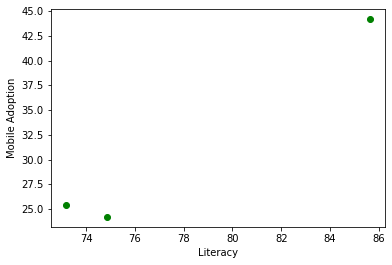

In [50]:
mat.scatter(lit1["Literacy rate, adult total (% of people ages 15 and above)"],mobile1["Mobile cellular subscriptions (per 100 people)"], color="green")
mat.xlabel("Literacy")
mat.ylabel("Mobile Adoption")
mat.show()

In [51]:
com1 = pan.DataFrame(lit1["Literacy rate, adult total (% of people ages 15 and above)"])

In [52]:
com1

,"Literacy rate, adult total (% of people ages 15 and above)"
0,85.642230
1,74.840029
2,73.169221


In [53]:
com1["Mobile Adoption"] = mobile1["Mobile cellular subscriptions (per 100 people)"]

In [54]:
com1

,"Literacy rate, adult total (% of people ages 15 and above)",Mobile Adoption
0,85.642230,44.175227
1,74.840029,24.207580
2,73.169221,25.411833


In [55]:
com1.corr()

,"Literacy rate, adult total (% of people ages 15 and above)",Mobile Adoption
"Literacy rate, adult total (% of people ages 15 and above)",1.000000,0.984288
Mobile Adoption,0.984288,1.000000


### Conclusion for scenario 2
#### The correlation is positive and is also very strong. The strong positive correlation shows that countries with higher literacy rate tend to have higher mobile adoption rate as well.

### Summary
#### The results for scenarios 1 and 2 showed the presence of confounding factor (income level) and is very important in influencing the correlation of the data. Countries with higher income tend to have higher literacy rate as well as higher mobile adoption rate. It could also suggest places with higher income tend to have higher technology adoption rate.